In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

from pprint import pprint
from zen_garden.postprocess.results import Results

In [4]:
res_basic = Results("../data/outputs/Ammonia_Production_Pathways/")

In [5]:
# Show the deafult analysis settings
pprint(res_basic.results[None]["analysis"])
# If a scenario analysis has been conducted, the scenario-depending analysis settings can be assessed by using the scenario names
#pprint(res_basic.results["scenario_1"]["analysis"])

{'dataset': '/Users/Ludwig/Documents/ETH/Master/Master_Thesis/ZEN-garden/data/Ammonia_Production_Pathways',
 'earliest_year_of_data': 1900,
 'folder_name_system_specification': 'system_specification',
 'folder_output': '/Users/Ludwig/Documents/ETH/Master/Master_Thesis/ZEN-garden/data/outputs',
 'header_data_inputs': {'set_capacity_types': 'capacity_type',
                        'set_carriers': 'carrier',
                        'set_conversion_technologies': 'technology',
                        'set_dependent_carriers': 'carrier',
                        'set_edges': 'edge',
                        'set_elements': 'element',
                        'set_input_carriers': 'carrier',
                        'set_location': 'location',
                        'set_nodes': 'node',
                        'set_output_carriers': 'carrier',
                        'set_storage_technologies': 'technology',
                        'set_technologies': 'technology',
                        'set_

In [8]:
df = res_basic.get_df('flow_import')
df

carrier      node  time_operation
ammonia      CH04  0                 0.000000
             CH05  0                 0.000000
electricity  CH04  0                 0.008333
             CH05  0                 0.008333
natural_gas  CH04  0                 0.891667
             CH05  0                 0.891667
Name: flow_import, dtype: float64

In [9]:
res_basic.get_total(df)

0
carrier     node          
ammonia     CH04  0.000000
            CH05  0.000000
electricity CH04  0.008333
            CH05  0.008333
natural_gas CH04  0.891667
            CH05  0.891667

In [23]:
res_basic.get_total("flow_import")

KeyError: 'cost'

In [11]:
df_full_basic = res_basic.get_full_ts("flow_import")
df_full_basic

0
carrier     node          
ammonia     CH04  0.000000
            CH05  0.000000
electricity CH04  0.008333
            CH05  0.008333
natural_gas CH04  0.891667
            CH05  0.891667

In [24]:
# you can also save the dataframe directly to a csv:
df = res_basic.get_df('demand', to_csv="test")
# this prints out the content of the generated csv (use !cat instead of !type if you're using mac or linux)
!cat test.csv

carrier,node,time_operation,demand
ammonia,CH04,0,0.1
ammonia,CH05,0,0.1
electricity,CH04,0,0.0
electricity,CH05,0,0.0
natural_gas,CH04,0,0.0
natural_gas,CH05,0,0.0


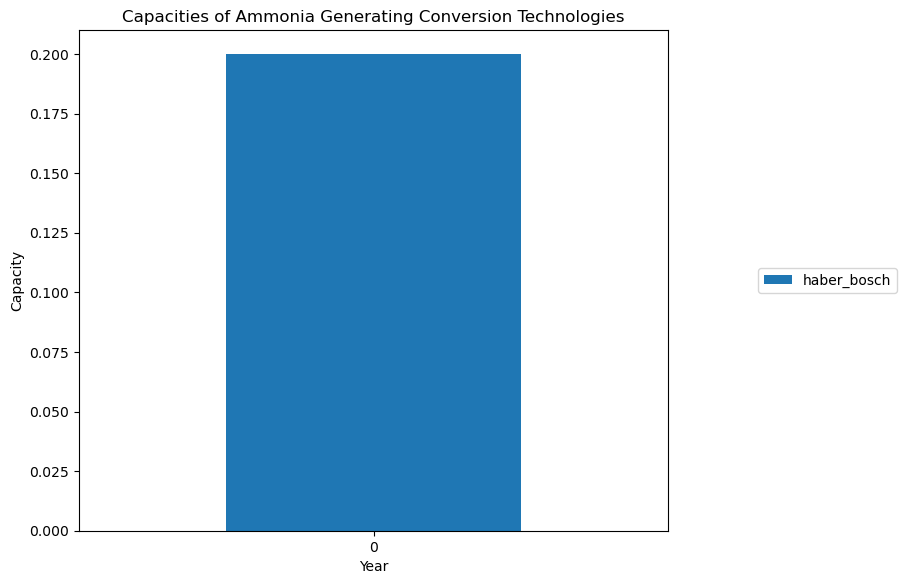

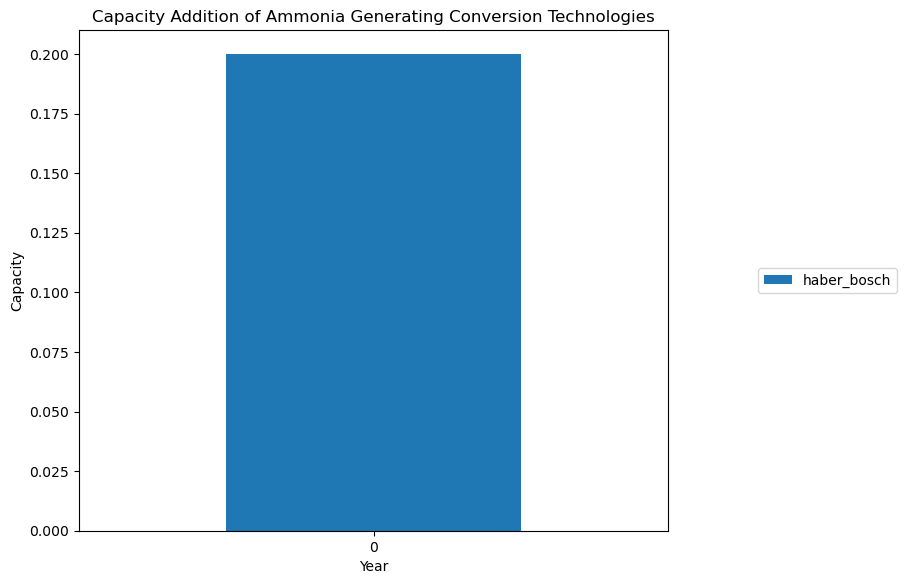

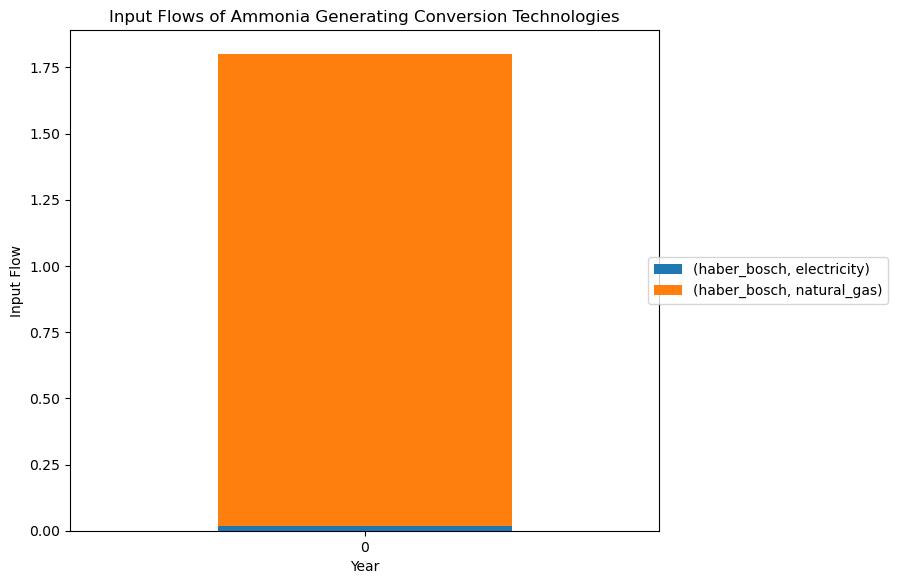

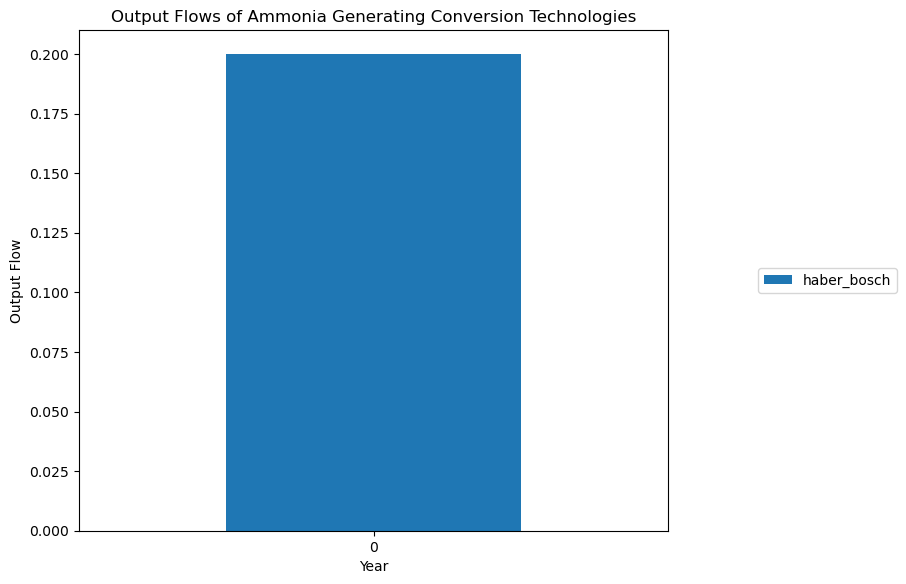

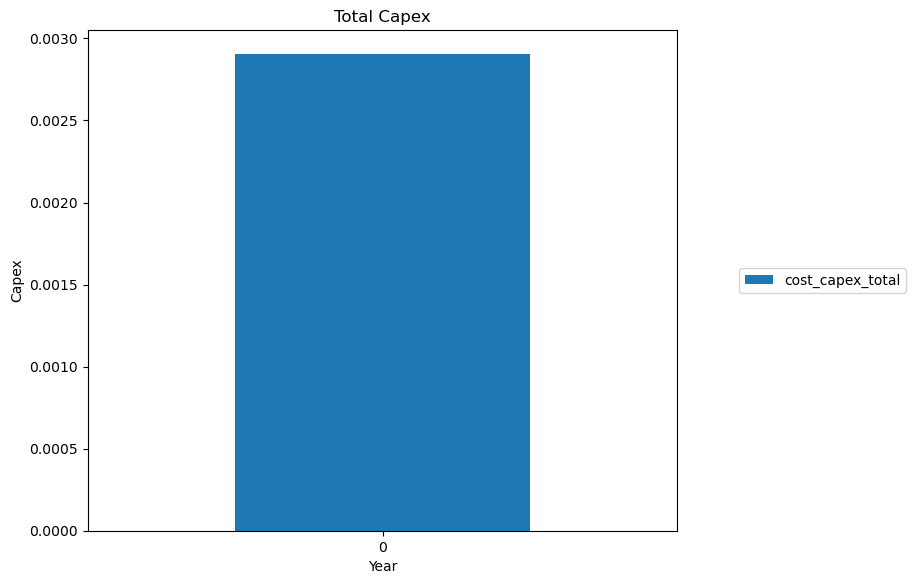

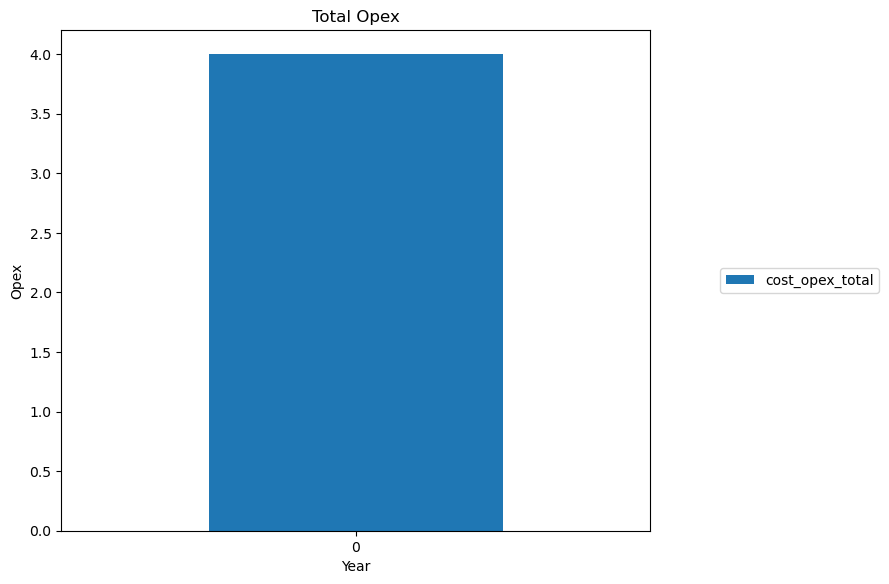

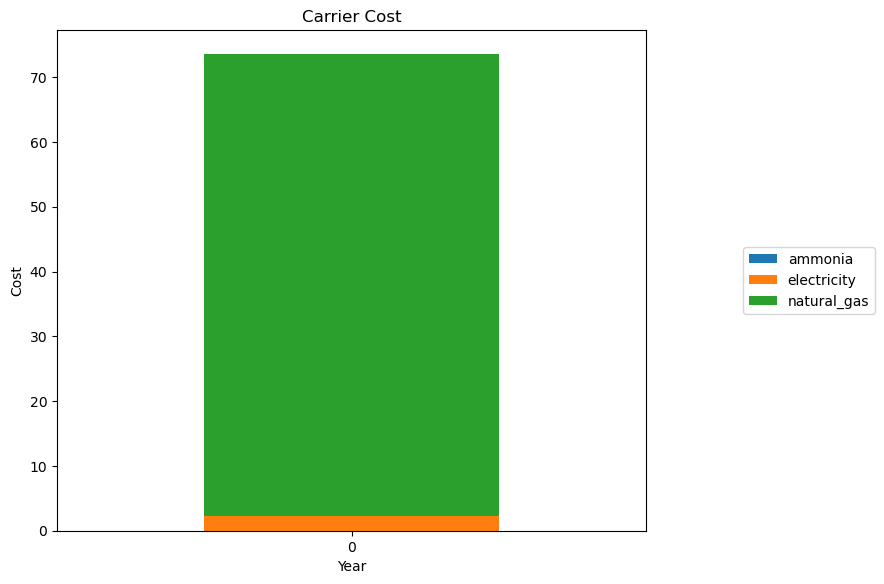

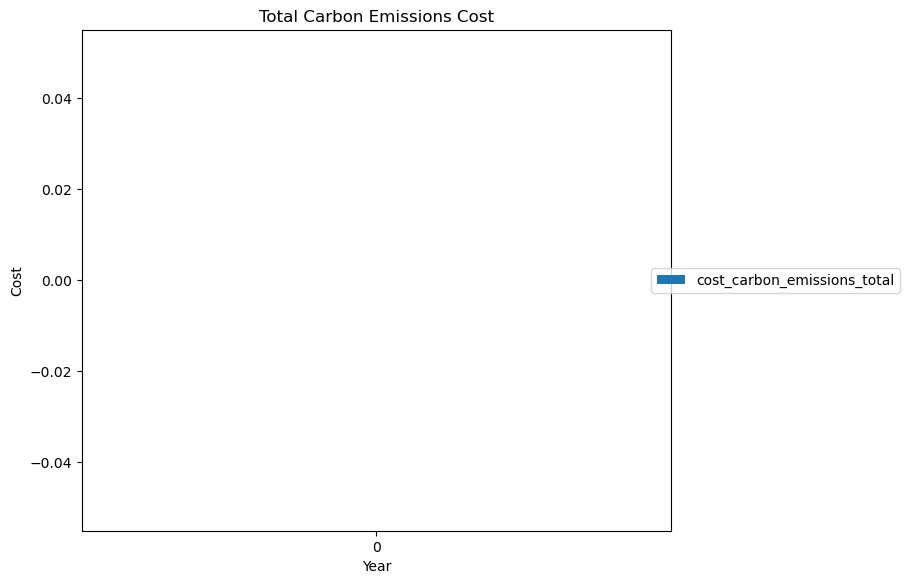

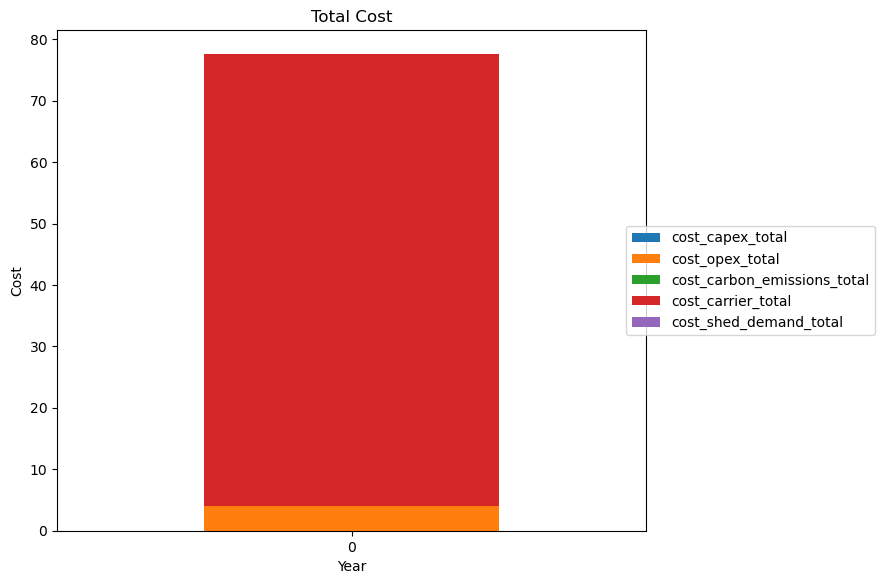

In [14]:
res_basic.standard_plots()

KeyError: 'CH04'

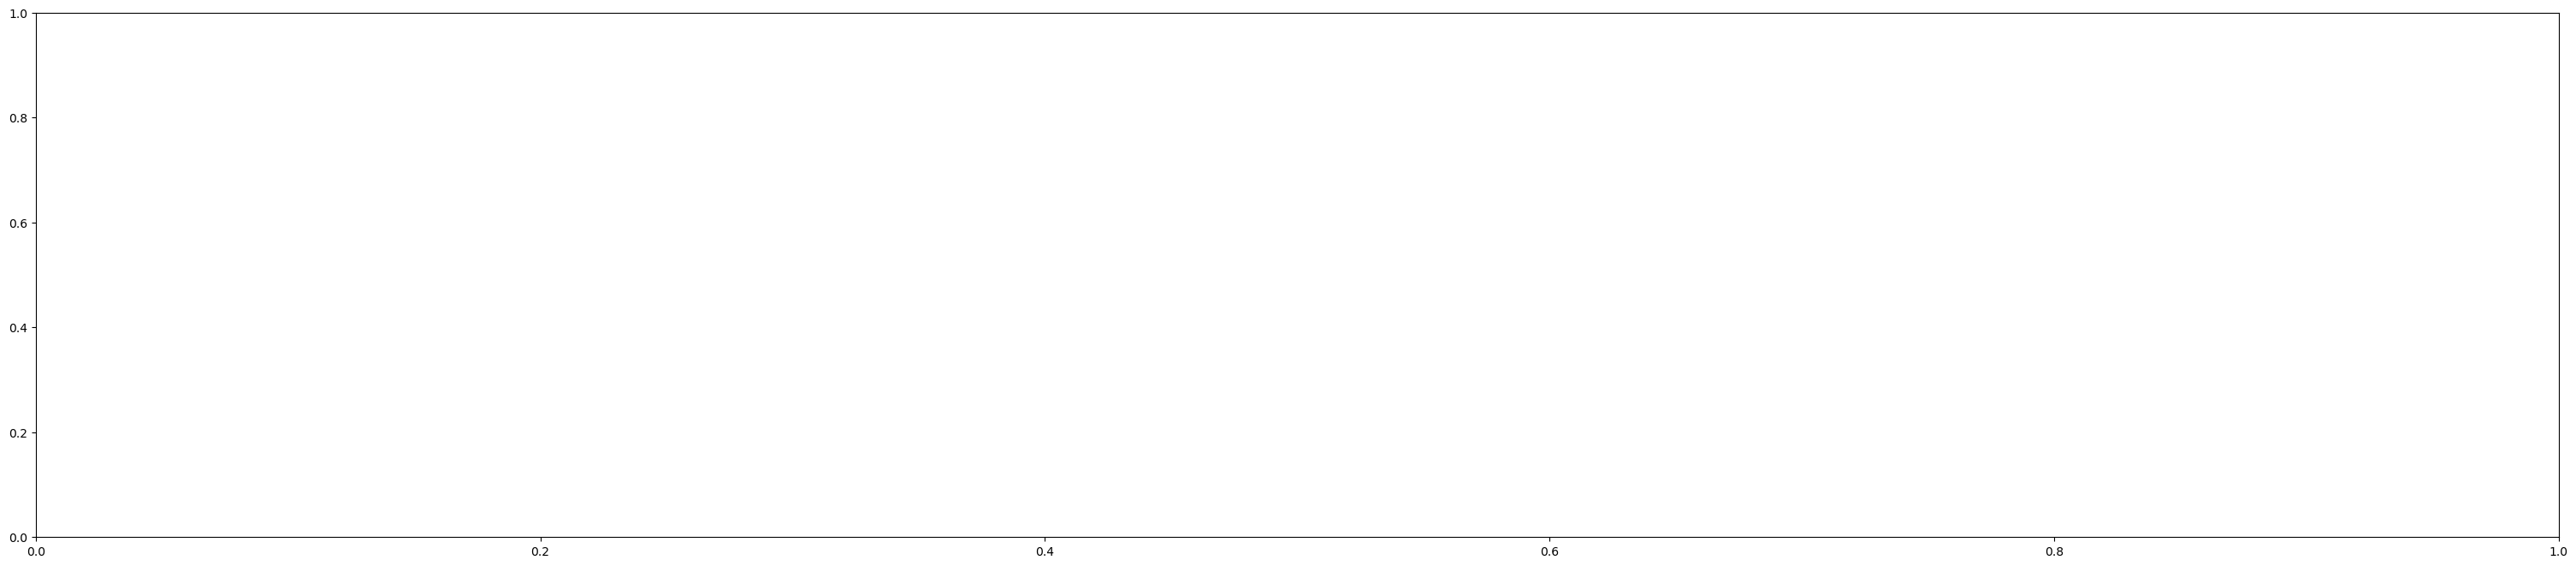

In [17]:
#Visualise the energy balance at the node Germany for the carrier heat in year 0
res_basic.plot_energy_balance("CH04","heat",0)
#create a zoom-in
res_basic.plot_energy_balance("CH04", "natural_gas", 0, start_hour=int(8760/2), duration=5*24)
#save your figure as a pdf(works identically for all three plot functions)(figure is shown anyway)
res_basic.plot_energy_balance("CH04", "natural_gas", 0, start_hour=int(8760/2), duration=5*24, save_fig=True)
#save your figure in another format
res_basic.plot_energy_balance("CH04", "natural_gas", 0, start_hour=int(8760/2), duration=5*24, save_fig=True, file_type="png")

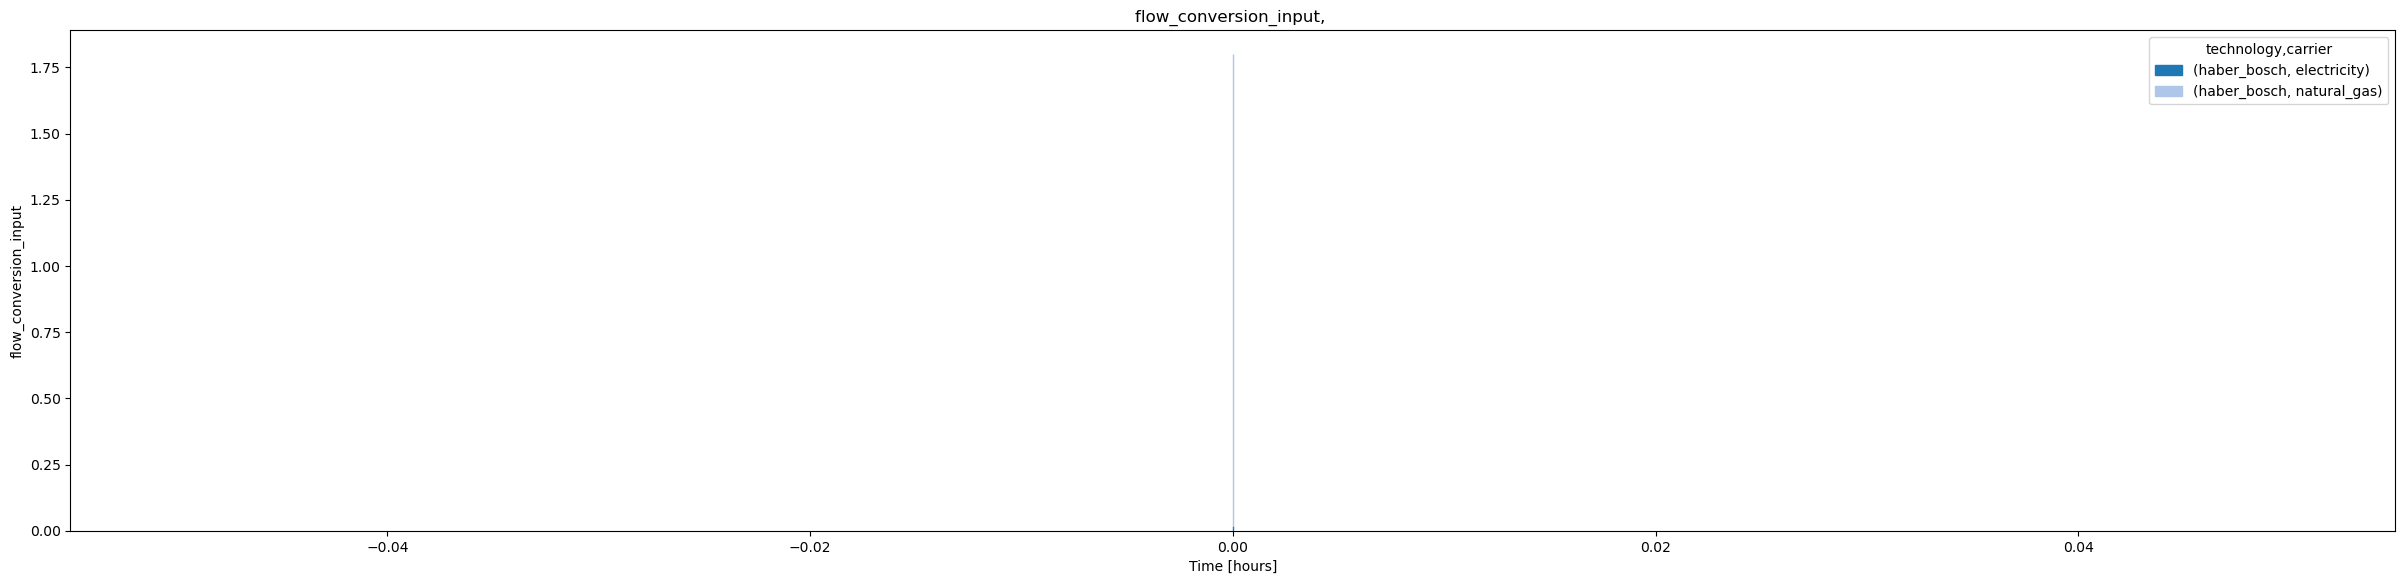

TypeError: no numeric data to plot

In [18]:
#Create more customized plots:
res_basic.plot("flow_conversion_input")
#time adjustments
#plot only second year
res_basic.plot("flow_conversion_input", year=1)
#create zoom-in
res_basic.plot("flow_conversion_input", year=1, start_hour=0, duration=500)
#use yearly time steps
res_basic.plot("flow_conversion_input", yearly=True)